## Introduction  
This project explores Netflix's streaming content based on type, country, release year, duration, genres, and more.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## DATA CLEANING

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1244,s1245,Movie,Indoo Ki Jawani,Abir Sengupta,"Kiara Advani, Aditya Seal, Mallika Dua, Rakesh...",India,"March 2, 2021",2020,TV-14,115 min,"Action & Adventure, Comedies, International Mo...",A spirited but naive young woman seeks a one-n...
7509,s7510,Movie,Moor,Jami,"Hameed Sheikh, Samiya Mumtaz, Shaz Khan, Abdul...","Pakistan, United States","November 1, 2017",2015,TV-14,135 min,"Dramas, Independent Movies, International Movies",A railway stationmaster tries to cope with his...
7012,s7013,Movie,How the Beatles Changed the World,Tom O'Dell,"George Harrison, John Lennon, Ringo Starr, Pau...","United States, United Kingdom","February 1, 2018",2017,TV-PG,110 min,"Documentaries, Music & Musicals",Interviews and rare archival footage illuminat...
4376,s4377,TV Show,The Final Table,NaN,Andrew Knowlton,United States,"November 20, 2018",2018,TV-PG,1 Season,Reality TV,Teams of elite chefs vie to impress the world'...
1437,s1438,TV Show,Surviving Death,NaN,NaN,United States,"January 6, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",What happens after we die? This docuseries exp...


In [11]:

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['description'] = df['description'].fillna('No Description')

df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Count of Movies vs TV Shows

This bar chart shows the distribution of content types on Netflix.  
We can see that **Netflix has more Movies than TV Shows** in this dataset, indicating a stronger focus on movie content.

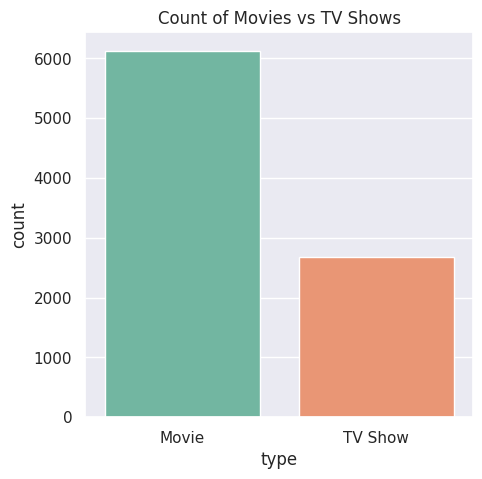

In [12]:
sns.set(style='darkgrid')

plt.figure(figsize=(5,5))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows')
plt.show()


##  Top 10 Countries by Number of Shows

This bar chart displays the **top 10 countries** that have produced the highest number of shows (Movies and TV Shows combined) on Netflix.  
We can see that countries like the **United States, India, and the United Kingdom** dominate in terms of content availability on the platform.


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


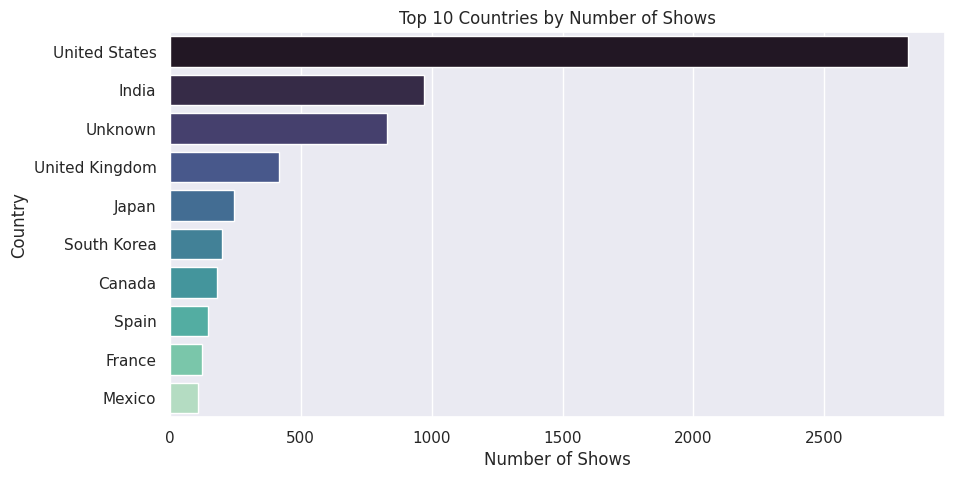

In [13]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()


 The United States leads by a large margin, followed by India and the UK. These countries appear to be Netflix’s major content contributors.


In [14]:
movies_by_country = df[df['type'] == 'Movie']['country'].value_counts().head(10)
shows_by_country = df[df['type'] == 'TV Show']['country'].value_counts().head(10)


## Top Countries by Number of Movies vs TV Shows

These side-by-side bar charts show the **top countries producing the most Movies and TV Shows** on Netflix, separately.  
The left chart highlights the countries leading in **Movie production**, while the right chart shows those leading in **TV Show content**.

This breakdown helps us understand how content type varies across different countries.


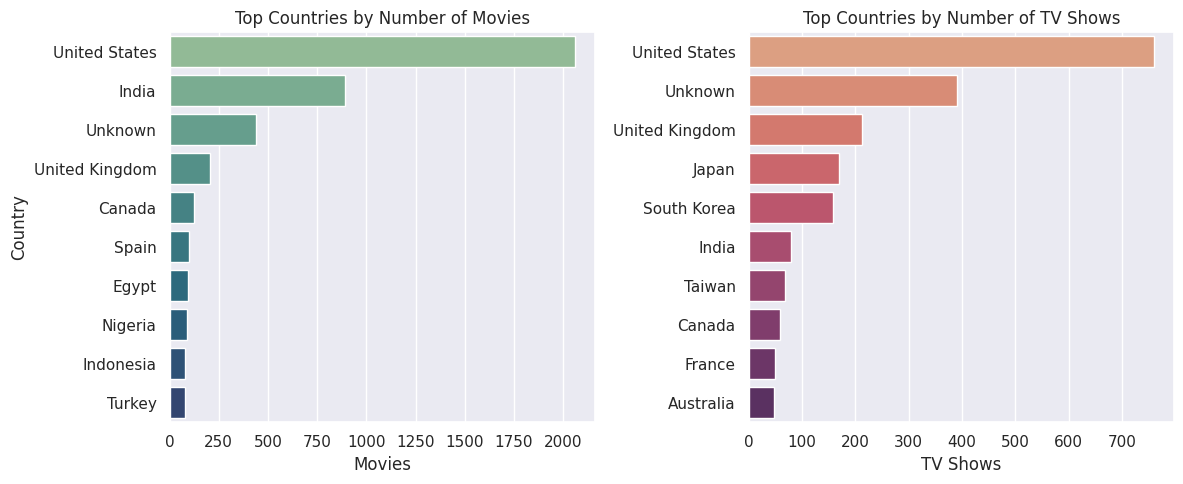

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=movies_by_country.values, y=movies_by_country.index, palette='crest')
plt.title('Top Countries by Number of Movies')
plt.xlabel('Movies')
plt.ylabel('Country')


plt.subplot(1,2,2)
sns.barplot(x=shows_by_country.values, y=shows_by_country.index, palette='flare')
plt.title('Top Countries by Number of TV Shows')
plt.xlabel('TV Shows')
plt.ylabel('')

plt.tight_layout()
plt.show()


## Content Released Per Year

This line plot shows the number of titles (Movies and TV Shows) released on Netflix each year.  
It helps us understand **how Netflix’s content has changed over time**, and identify any major trends or spikes.


    release_year  count
0           1925      1
1           1942      2
2           1943      3
3           1944      3
4           1945      4
..           ...    ...
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592

[74 rows x 2 columns]


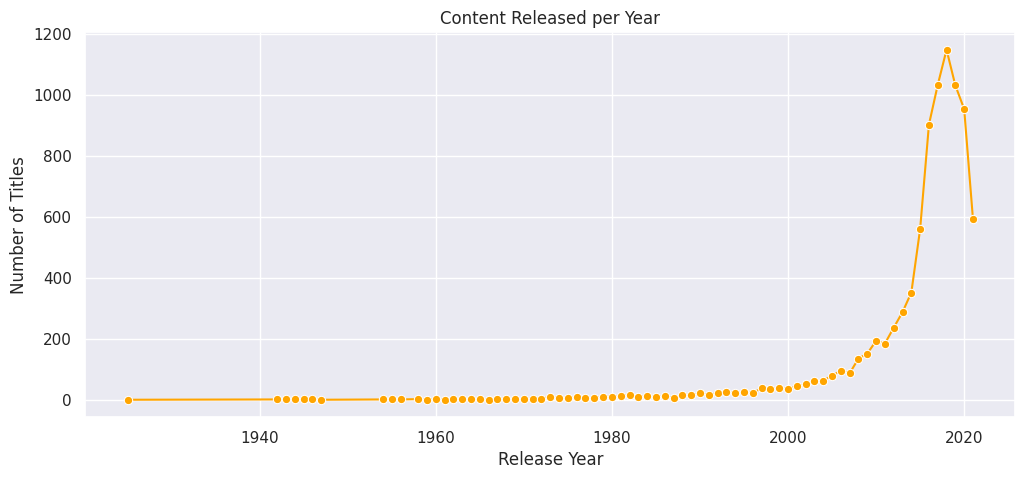

In [16]:
yearly_data = df.groupby('release_year').size().reset_index(name='count')
yearly_data = yearly_data.sort_values('release_year')
print(yearly_data)


plt.figure(figsize=(12,5))
sns.lineplot(data=yearly_data, x='release_year', y='count', marker='o', color='orange')
plt.title('Content Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


We can see how the Netlix's content has grown over the years and we can see a noticeable spike after 2015

In [17]:
print(yearly_data.isin([np.inf, -np.inf]).sum())  
print(yearly_data.isnull().sum())  


release_year    0
count           0
dtype: int64
release_year    0
count           0
dtype: int64


## Distribution of Movie Durations

This histogram shows how **Duration of the movies** on Netflix are distributed, based on the number of minutes.  
It gives us insight into **how long most movies are**, helping us understand content length preferences on the platform.


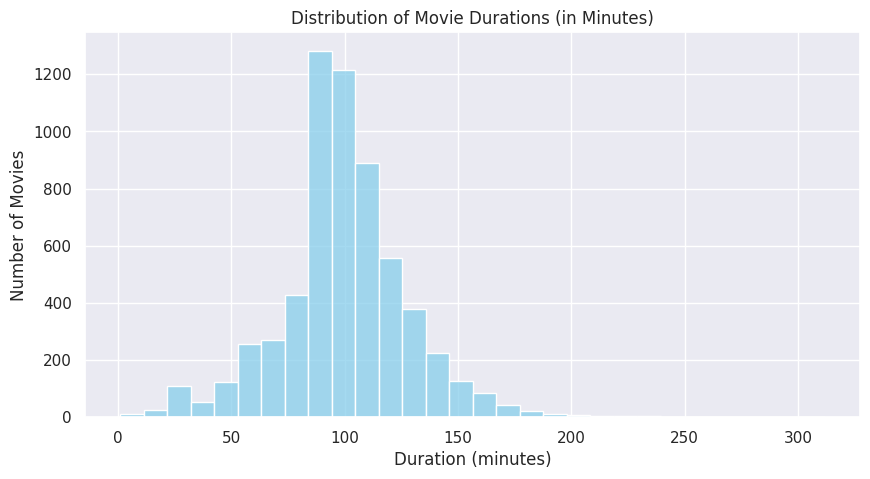

In [18]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies_df['minutes'].dropna(), bins=30, color='skyblue')
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


We can see that most of the Netlix's movies have duration between 80-120 minutes

## Number of TV Shows by Season Count

This bar chart shows the **distribution of TV Shows based on their number of seasons**.  

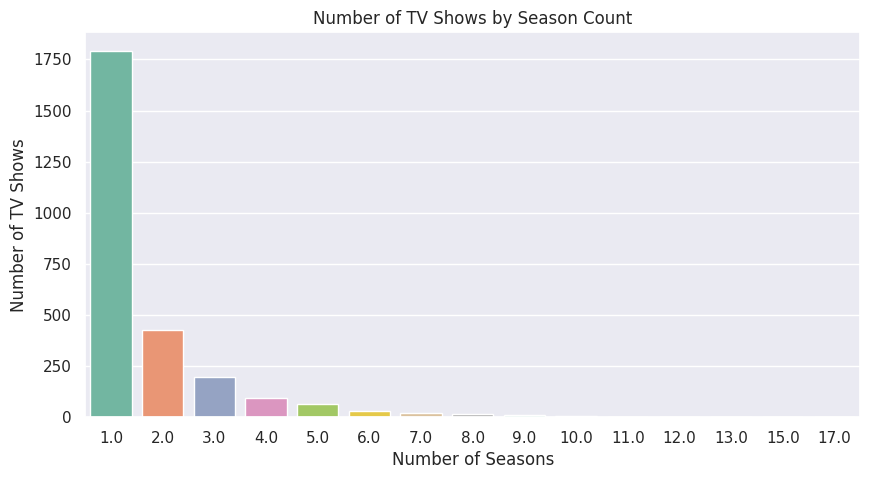

In [19]:
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.countplot(x='seasons', data=tv_df, palette='Set2')
plt.title('Number of TV Shows by Season Count')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()


## Top 10 Most Popular Genres

This bar chart displays the **top 10 most frequent genres** across both Movies and TV Shows on Netflix.  

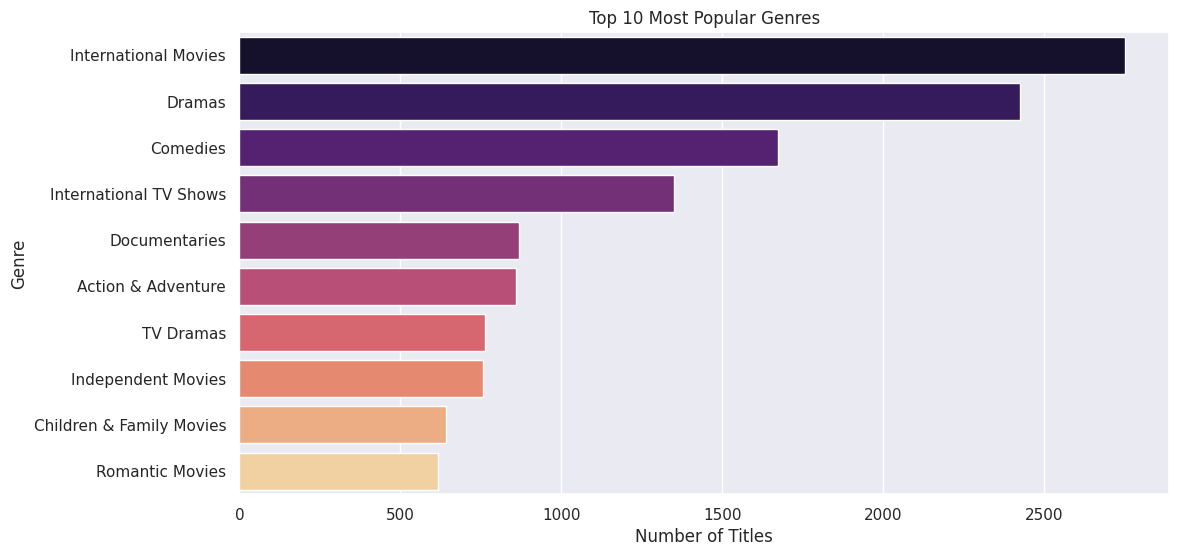

In [20]:
df['listed_in'] = df['listed_in'].fillna('')  
genres_exploded = df['listed_in'].str.split(',').explode().str.strip()

top_genres = genres_exploded.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## Top 10 Directors by Number of Shows

This bar chart shows the **top 10 directors** associated with Netflix titles.  
However, a large portion of the data has missing or unknown director information.


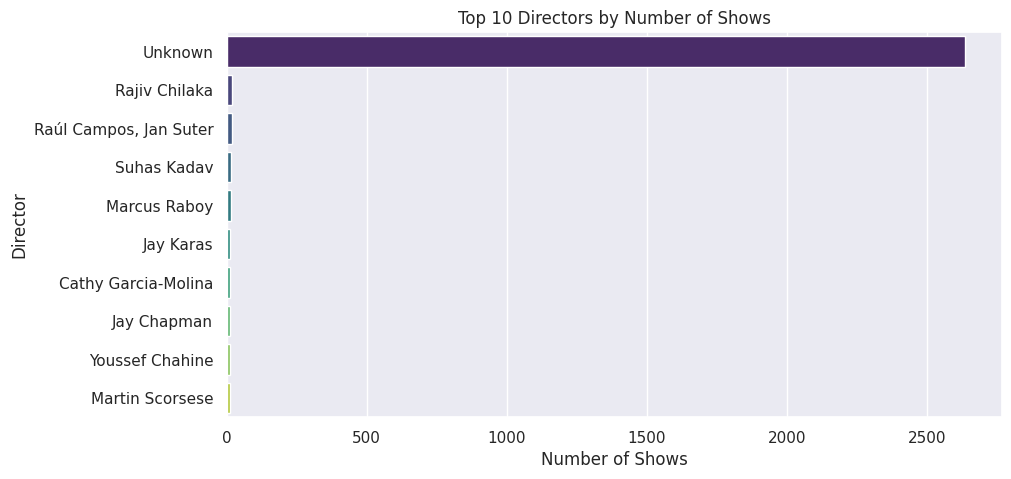

In [21]:

top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Director')
plt.show()


A significant number of titles on Netflix list the director as **"Unknown"**, indicating the missing values or that director information is not always provided. Among the known entries, only a few directors appear repeatedly.


In [22]:
df.to_csv('netflix_data_cleaned.csv', index=False)